# **Feature Engineering**
Feature engineering is the process of transforming raw data into a format that machine learning (ML) models can use to make predictions. The goal of feature engineering is to improve the performance of ML models by making them more accurate.

## Handling missing data
Missing values occurs in dataset when some of the informations is not stored for a variable
There are 3 mechanisms

### 1 Missing Completely at Random, MCAR:
Missing completely at random (MCAR) is a type of missing data mechanism in which the probability of a value being missing is unrelated to both the observed data and the missing data. In other words, if the data is MCAR, the missing values are randomly distributed throughout the dataset, and there is no systematic reason for why they are missing.

For example, in a survey about the prevalence of a certain disease, the missing data might be MCAR if the survey participants with missing values for certain questions were selected randomly and their missing responses are not related to their disease status or any other variables measured in the survey.


### 2. Missing at Random MAR:
Missing at Random (MAR) is a type of missing data mechanism in which the probability of a value being missing depends only on the observed data, but not on the missing data itself. In other words, if the data is MAR, the missing values are systematically related to the observed data, but not to the missing data.
Here are a few examples of missing at random:

Income data: Suppose you are collecting income data from a group of people, but some participants choose not to report their income. If the decision to report or not report income is related to the participant's age or gender, but not to their income level, then the data is missing at random.

Medical data: Suppose you are collecting medical data on patients, including their blood pressure, but some patients do not report their blood pressure. If the patients who do not report their blood pressure are more likely to be younger or have healthier lifestyles, but the missingness is not related to their actual blood pressure values, then the data is missing at random.

## 3. Missing data not at random (MNAR) 
It is a type of missing data mechanism where the probability of missing values depends on the value of the missing data itself. In other words, if the data is MNAR, the missingness is not random and is dependent on unobserved or unmeasured factors that are associated with the missing values.

For example, suppose you are collecting data on the income and job satisfaction of employees in a company. If employees who are less satisfied with their jobs are more likely to refuse to report their income, then the data is not missing at random. In this case, the missingness is dependent on job satisfaction, which is not directly observed or measured.

In [6]:
import seaborn as sns
dt = sns.load_dataset('titanic')
dt.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# checking missing values
dt.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# getting total missing values of each coloums
dt.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

One way of getting rid of missing values is to *delete* the rows having `null` value

In [9]:
# but here it won't be suitable as we will loose a huge a amount of data by this
dt.dropna().shape

(182, 15)

In [10]:
# but we can delete the column if we want, as there are 688 missing values in 'deck' so better drop it.
dt.dropna(axis=1)

# this thing is not permanent though as by doing this we will loose the age column also, that we don't want

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


### Imputation techniques to handle missing values
We can get rid of missing values by filling them instead of deleting them

we can replace them with 
- Mean: suitable when the column is normally distributed
- Median: when the data is right or left skewed
- Mode: in case of categarical data

<Axes: xlabel='age', ylabel='Count'>

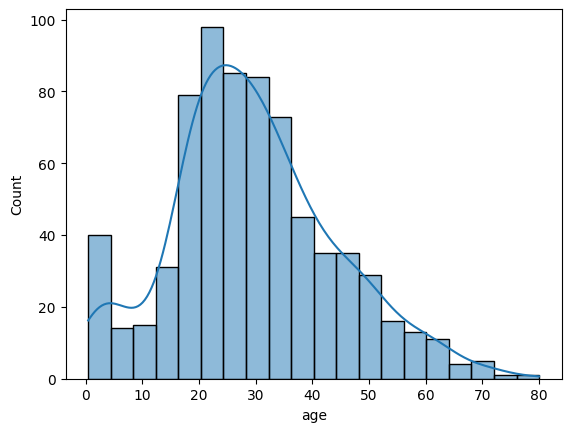

In [11]:
sns.histplot(dt['age'], kde=True)

# age is normally distributed

In [12]:
# lets try to replace null values with mean
age_mean = dt['age'].mean()
dt['age_filled'] = dt['age'].fillna(age_mean)
dt[['age', 'age_filled']]

,age,age_filled
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
...,...,...
886,27.0,27.000000
887,19.0,19.000000
888,NaN,29.699118
889,26.0,26.000000


In [13]:
# We can also replace null values with median (although that's not needed here)
age_median = dt['age'].median()
dt['age_filled_median'] = dt['age'].fillna(age_median)
dt[['age', 'age_filled', 'age_filled_median']]


,age,age_filled,age_filled_median
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


In [14]:
# lets replace the embarked null values with mode of that column
em_mode = dt[dt['embarked'].notna()]['embarked'].mode()[0]
dt['embarked_filled'] = dt['embarked'].fillna(em_mode)
dt[['embarked', 'embarked_filled']]

,embarked,embarked_filled
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


## Handling Imbalanced data

Handling the imbalance data in a data set is necessary to make the Machine learning model work well
let us understand it with an example: suppose you have a data set of 1000 data points out of which 900 is `0` and 100 is `1`. In this case the model can be baised towards `0`. To avoid this we can do 2 things

- __Upsampling__: Increase the minority elements [in the above case, we can increase the number of `1`s to 900]
- __Downsampling__: Decrease the majority elements [in the above case, we can decrease the number of `0`s to 100]. However, this will lead to a lot of data loss

In [15]:
import numpy as np;
import pandas as pd;


# creating an imbalance data first
data_0 = {
    'feature_1': np.random.normal(loc=0, scale=1, size=900),
    'feature_2': np.random.normal(loc=0, scale=1, size=900),
    'target': [0 for x in range(900)]
}

data_1 = {
    'feature_1': np.random.normal(loc=0, scale=1, size=100),
    'feature_2': np.random.normal(loc=0, scale=1, size=100),
    'target': [1 for x in range(100)]
}

df_0 = pd.DataFrame(data_0)
df_1 = pd.DataFrame(data_1)

df_imbalanced = pd.concat([df_0, df_1]).reset_index(drop=True)
df_imbalanced


,feature_1,feature_2,target
0,-1.228654,-1.669080,0
1,1.570992,-0.817410,0
2,-0.904406,-0.092802,0
3,1.272052,0.042018,0
4,-0.258045,-0.541928,0
...,...,...,...
995,-0.064881,-1.124535,1
996,-1.303092,0.240316,1
997,1.042604,-0.642055,1
998,0.380566,0.532186,1


In [16]:
df_imbalanced['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

_Up sampling_

In [17]:
# diving them
df_min = df_imbalanced[df_imbalanced['target'] == 1]
df_maj = df_imbalanced[df_imbalanced['target'] == 0]

df_min, df_maj

(     feature_1  feature_2  target
 900   1.018591  -2.954052       1
 901  -0.243482  -0.406742       1
 902  -0.369520   1.653880       1
 903   0.206265  -0.068876       1
 904   0.992852  -2.120348       1
 ..         ...        ...     ...
 995  -0.064881  -1.124535       1
 996  -1.303092   0.240316       1
 997   1.042604  -0.642055       1
 998   0.380566   0.532186       1
 999  -0.997688   0.239836       1
 
 [100 rows x 3 columns],
      feature_1  feature_2  target
 0    -1.228654  -1.669080       0
 1     1.570992  -0.817410       0
 2    -0.904406  -0.092802       0
 3     1.272052   0.042018       0
 4    -0.258045  -0.541928       0
 ..         ...        ...     ...
 895   0.025462  -0.208718       0
 896  -0.680429  -0.351107       0
 897  -2.119601   0.809266       0
 898   2.076410   1.200353       0
 899  -0.279860   0.547204       0
 
 [900 rows x 3 columns])

In [18]:
from sklearn.utils import resample

df_min_upsampled = resample(df_min, replace=True, n_samples=len(df_maj), random_state=42)
df_min_upsampled['target'].value_counts()  # now we have 900 1s

1    900
Name: target, dtype: int64

In [19]:
# concatenate with original
df_balanced = pd.concat([df_maj, df_min_upsampled]).reset_index(drop=True)
df_balanced['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

_Down sampling_

In [20]:
df_maj_downsampled = resample(df_maj, replace=False, n_samples=len(df_min), random_state=42)
df_maj_downsampled['target'].value_counts()

0    100
Name: target, dtype: int64

In [21]:
df_balanced = pd.concat([df_maj_downsampled, df_min]).reset_index(drop=True)
df_balanced['target'].value_counts()

0    100
1    100
Name: target, dtype: int64

_SMOTE_

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [22]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42, weights=[0.90])
X,y

(array([[ 1.0735459 , -1.10133925],
        [ 0.75594526, -1.1723519 ],
        [ 1.35447877, -0.94852841],
        ...,
        [-2.15090138, -2.98937226],
        [ 2.45164689, -0.1566294 ],
        [ 3.64147835,  0.75692519]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 

In [23]:
df_X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df_y = pd.DataFrame(y, columns=['target'])
df = pd.concat([df_X, df_y], axis=1)
df

,feature_1,feature_2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0
...,...,...,...
995,1.713939,0.451639,1
996,1.509473,-0.794996,0
997,-2.150901,-2.989372,0
998,2.451647,-0.156629,0


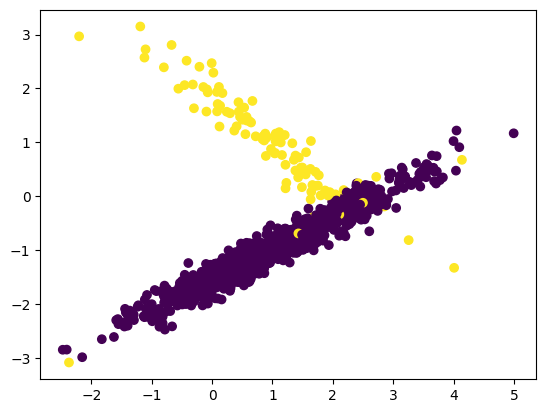

In [24]:
import matplotlib.pyplot as plt
plt.scatter(df['feature_1'], df['feature_2'], c=df['target'])
plt.show()

In [25]:
df['target'].value_counts()

0    896
1    104
Name: target, dtype: int64

In [31]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X,y = oversample.fit_resample(df[['feature_1', 'feature_2']], df['target'])
X.shape, y.shape

((1792, 2), (1792,))

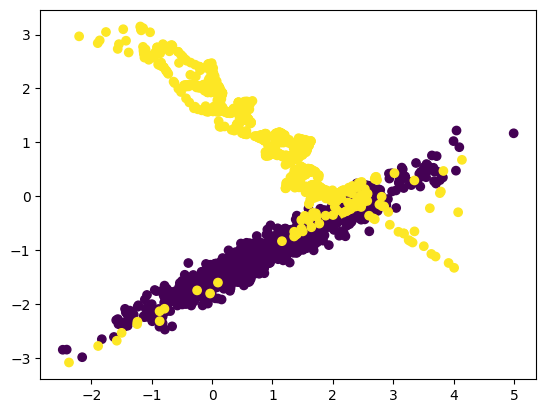

In [36]:
df_X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df_y = pd.DataFrame(y, columns=['target'])
df = pd.concat([df_X, df_y], axis=1)

plt.scatter(df['feature_1'], df['feature_2'], c=df['target'])
plt.show()

In [33]:
df['target'].value_counts()

0    896
1    104
Name: target, dtype: int64